In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


# ✅ Part 1: Understand the Data
● Load the dataset using pandas

● Briefly explore its structure: columns, datatypes, missing values

● Summarize insights: Which features are categorical? Which are numerical? Which
have missing data?


In [ ]:
df = pd.read_csv("C:/Fares Data/University/Samsung X LifeMakers Internship/Titanic Dataset Cleaning/titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# After showing the dataset stats

1.   There are 7 numerical columns ( 2 float (Age , Float) , 5 int ( Passenger Id , Survived , Pclass , SibSp , Parch )) and 5 categorical columns ( Name , Sex , Ticket , Cabin , Embarked )
2.   The columns Age, Cabin and Embarked contain null values which needs to be handeled



#✅ Part 2: Clean the Data
● Handle Missing Values:

   ○ Propose and apply appropriate strategies (mean/median/imputation/drop)   
   for features

● Drop features you believe are irrelevant for survival prediction (with reasoning).

# There are some irrelevant columns that needs to be dropped :


1.   Name : cause their name has nothing to do with their survival
2.   Ticket, Fare and Cabin   : They are relevant but can be replaced with Pclass
3.   Embarked : irrelevant beacuse where the passenger got on titanic from is not that important

In [6]:
df.drop(['Name', 'Cabin', 'Fare', 'Ticket', 'Embarked'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [7]:
df['Age'] = df['Age'].fillna(df.Age.mean())
df.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


#✅ Part 3: Transform the Data
● Label Encode or One-Hot Encode categorical features if needed.

● Perform Feature Engineering:

1.  Create a new feature, e.g., FamilySize
2.  Optionally extract titles (Mr, Mrs, Miss...) from names as a new feature.

● Normalize/scale numerical features using Min-Max Scaling or Standardization

In [8]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


# We need a new feature that will help more :
FamilySize : Large groups/families had different survival rates compared to individuals.

Child , Teen , Adult and Senior : Children and seniors had higher survival rates.

In [9]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,FamilySize
0,1,0,3,male,22.0,2
1,2,1,1,female,38.0,2
2,3,1,3,female,26.0,1
3,4,1,1,female,35.0,2
4,5,0,3,male,35.0,1


In [10]:
df['Child'] = df['Age'] < 18
df['Teen'] = (df['Age'] >= 18) & (df['Age'] < 25)
df['Adult'] = (df['Age'] >= 25) & (df['Age'] < 60)
df['Senior'] = df['Age'] >= 60
df.drop(['Age'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,FamilySize,Child,Teen,Adult,Senior
0,1,0,3,male,2,False,True,False,False
1,2,1,1,female,2,False,False,True,False
2,3,1,3,female,1,False,False,True,False
3,4,1,1,female,2,False,False,True,False
4,5,0,3,male,1,False,False,True,False


In [11]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Sex,FamilySize,Child,Teen,Adult,Senior
0,1,0,3,1,2,False,True,False,False
1,2,1,1,0,2,False,False,True,False
2,3,1,3,0,1,False,False,True,False
3,4,1,1,0,2,False,False,True,False
4,5,0,3,1,1,False,False,True,False


#✅ Part 4: Export & Summarize

● Save the cleaned/preprocessed DataFrame to a new CSV called
titanic_cleaned.csv


In [12]:
# Export the cleaned dataset to CSV
df.to_csv("titanic_cleaned.csv", index=False)

#✅ Part 5: Visualize & Summarize
● Visualize distributions before and after cleaning (Age, Fare, Survived vs.
Sex/Pclass)

● Identify and briefly discuss which features you suspect will have the strongest impact
on survival


# Columns that will affect predicting the survival :

1.   All ages columns will affect cause the results because children and seniors had highier survival rate the teens and adults
2.   Family Size is an added feature that will also affect the results because single passengers had higher survival rate than families because they got no one to worry about but themselves.
3.   Also passenger's sex is so relevant cause women had higher survival rates.
4.   Every Passenger's class affects the results cause it indicates if they were close to the life boats or not.





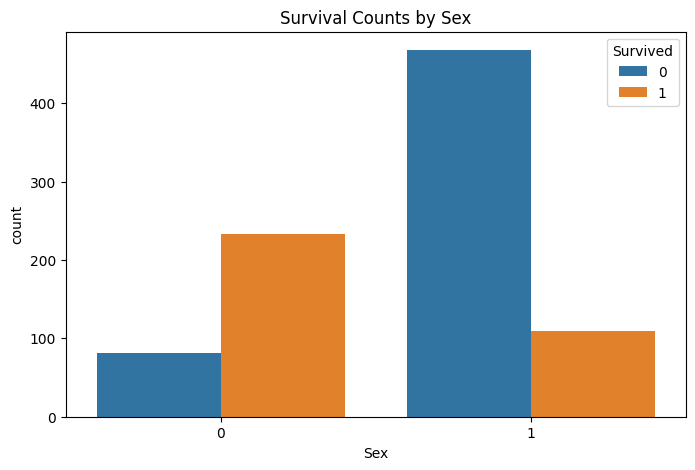

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival Counts by Sex")
plt.show()

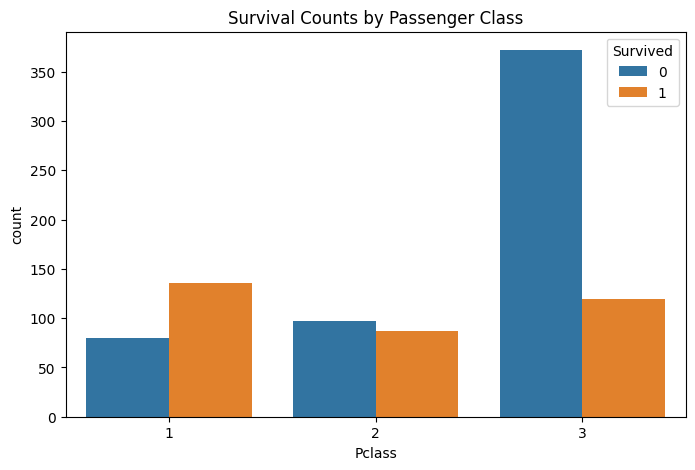

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival Counts by Passenger Class")
plt.show()